## Задание.
* Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
* Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
* Разделите данные на выборку для обучения и тестирования
* Постройте модель LDA
* Визуализируйте предсказания для тестовой выборки и центры классов
* Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
* Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

### Загрузка данных

In [3]:
# Загрузка данных.
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df = iris_df[['sepal length (cm)', 'sepal width (cm)']]
iris_class = iris.target

In [4]:
# Деление данных на тестовую и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_class, test_size=0.33, random_state=42)

### Построение модели линейного дискриминантного анализа.

In [6]:
lda_model = LinearDiscriminantAnalysis() # Созднание модели LDA

In [7]:
lda_model.fit(X_train, y_train) # Обучение

LinearDiscriminantAnalysis()

In [45]:
predict_category = lda_model.predict(X_test) # Предсказанные значения

In [8]:
lda_model.means_

array([[4.96451613, 3.37741935],
       [5.85142857, 2.72571429],
       [6.55294118, 2.97058824]])

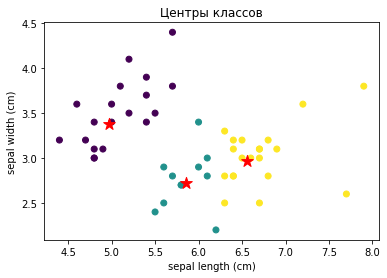

In [67]:
# Визуализация предсказаний для тестовой выборки с центрами классов.
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=predict_category)
plt.scatter(lda_model.means_[:, 0], lda_model.means_[:, 1], color='red', s=150, marker='*')
plt.title('Центры классов')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

### Нормирование данных

In [14]:
scaler = StandardScaler() # Создаем скалер для нормаирования данных

In [15]:
X_scaled = scaler.fit_transform(iris_df) # Нормируем

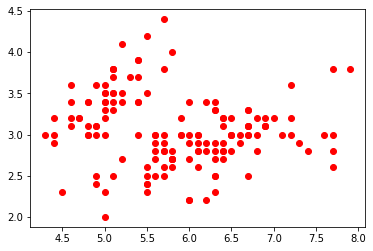

In [16]:
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], color='r') # Данные до нормирования

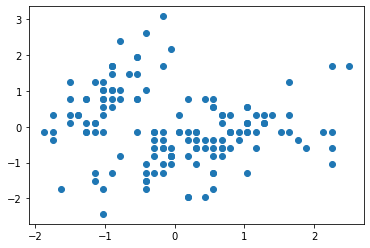

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1]) # Данные после нормирования

### Находим оптимальное число кластеров.

In [19]:
# Алгоритм нахождения оптимального числа кластеров
k_inertia = []

count_cluster = range(1, 10)

for k in count_cluster:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

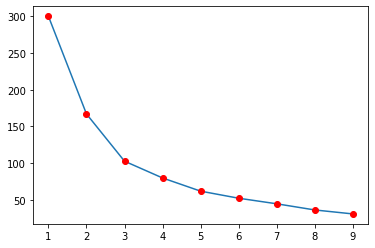

In [25]:
# Смотрим на график используя метод локтя, в данном случае оптимальное число кластеров = 3
# Так как после 3 инерция не значительная.
plt.plot(count_cluster, k_inertia)
plt.plot(count_cluster, k_inertia, 'ro')

### Делим на кластеры

In [22]:
aglo_clustering = AgglomerativeClustering(n_clusters=3) 

In [23]:
clusters = aglo_clustering.fit_predict(X_scaled)

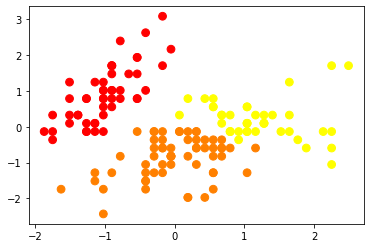

In [24]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)